#DOCUMENTATION

In [ ]:
"""
This Python script performs the following tasks:

1. Imports necessary libraries for data manipulation, feature extraction, model training, and evaluation.
2. Reads a CSV file named "train.csv" and selects two columns: 'comment' and 'reting'.
3. Renames the 'reting' column to 'rating'.
4. Converts the 'rating' column to numeric values and filters the DataFrame to only include rows with ratings between 1.0 and 5.0.
5. Groups the DataFrame by 'rating' and randomly samples an equal number of rows from each group to ensure balanced classes.
6. Preprocesses the 'comment' column by converting it to lowercase and removing punctuation and non-alphabetic characters.
7. Splits the preprocessed data into training and testing sets using a 90/10 split.
8. Trains a LightGBM classifier model on the training data.
9. Evaluates the model's accuracy on the testing data.
10. Creates and displays a confusion matrix to visualize the model's performance on each class.
"""

'\nThis Python script performs the following tasks:\n\n1. Imports necessary libraries for data manipulation, feature extraction, model training, and evaluation.\n2. Reads a CSV file named "train.csv" and selects two columns: \'comment\' and \'reting\'.\n3. Renames the \'reting\' column to \'rating\'.\n4. Converts the \'rating\' column to numeric values and filters the DataFrame to only include rows with ratings between 1.0 and 5.0.\n5. Groups the DataFrame by \'rating\' and randomly samples an equal number of rows from each group to ensure balanced classes.\n6. Preprocesses the \'comment\' column by converting it to lowercase and removing punctuation and non-alphabetic characters.\n7. Splits the preprocessed data into training and testing sets using a 90/10 split.\n8. Trains a LightGBM classifier model on the training data.\n9. Evaluates the model\'s accuracy on the testing data.\n10. Creates and displays a confusion matrix to visualize the model\'s performance on each class.\n'

#LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#DATA

In [ ]:
df = pd.read_csv("train.csv")
df.head()

,item_id1,item_id2,brand,user_id,date,comment,reting,negative_comment,positive_comment
0,401,4010201,826,2217,2013-06-28,"2,5 года работала и все...устала! Лампочка гор...",2.0,NaN,NaN
1,403,4030101,1425,1026,2010-07-04,Через 2 месяца после истечении гарантийного ср...,2.0,NaN,NaN
2,401,4010401,124,2769,2010-05-27,пользуюсь уже три недели. нареканий ни каких н...,4.0,NaN,NaN
3,203,2030301,93,508,2016-10-11,Ребят этот системный блок подойдёт для игры кс...,5.0,NaN,NaN
4,205,2050201,656,1049,2010-02-26,"я считаю, что яри замечательный телефон! Прият...",5.0,NaN,NaN


#DATA CLEARNING Part-1

In [ ]:
df_2c = df[['comment','reting']]
df_2c = df_2c.rename(columns={'reting':'rating'})

df_2c['rating'] = pd.to_numeric(df_2c['rating'], errors='coerce')
df_2c = df_2c[df_2c['rating'].isin([1.0, 2.0, 3.0, 4.0, 5.0])]

df_2c.head()

,comment,rating
0,"2,5 года работала и все...устала! Лампочка гор...",2.0
1,Через 2 месяца после истечении гарантийного ср...,2.0
2,пользуюсь уже три недели. нареканий ни каких н...,4.0
3,Ребят этот системный блок подойдёт для игры кс...,5.0
4,"я считаю, что яри замечательный телефон! Прият...",5.0


#DATA CLEANING Part-2

In [ ]:
df_2c['rating'] = df_2c['rating'].astype(int)

In [ ]:
df_2c['rating'].value_counts()

rating
5    9211
4    2609
1    1468
3    1245
2     854
Name: count, dtype: int64

In [ ]:
min_count = df_2c['rating'].value_counts().min()
df_2c = df_2c.groupby('rating').sample(n=min_count, random_state=42)
df_2c['rating'].value_counts()


rating
1    854
2    854
3    854
4    854
5    854
Name: count, dtype: int64

In [ ]:
df_pre = df_2c.sample(frac=1)

In [ ]:
df_pre.head()

,comment,rating
7924,"Купила вчера,опробовала и мне не понравился. М...",2
6220,Фильтр абсолютно бесполезен. При любом скачке ...,1
243,"Вытяжка не плохая,в работе уже 3 года,на треть...",3
12838,Если кто хочет понастальгировать по китайскому...,1
337,мне очень нравился! почтой пользоваться - любо...,3


#DATA PREPARING

In [ ]:
x,y=df_pre['comment'],df_pre['rating']

In [ ]:
vectorizer = CountVectorizer()
x_vec = vectorizer.fit_transform(x)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_vec.toarray())


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=41)


#MACHINE LEARNING

In [ ]:
model_lgb = lgb.LGBMClassifier(random_state=42)
model_lgb.fit(x_train, y_train)
y_pred_lgb = model_lgb.predict(x_test)
print(accuracy_score(y_test, y_pred_lgb))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4439
[LightGBM] [Info] Number of data points in the train set: 3843, number of used features: 1098
[LightGBM] [Info] Start training from score -1.590876
[LightGBM] [Info] Start training from score -1.632603
[LightGBM] [Info] Start training from score -1.606320
[LightGBM] [Info] Start training from score -1.603730
[LightGBM] [Info] Start training from score -1.614133
0.4449648711943794


#CONFUSION MATRIX

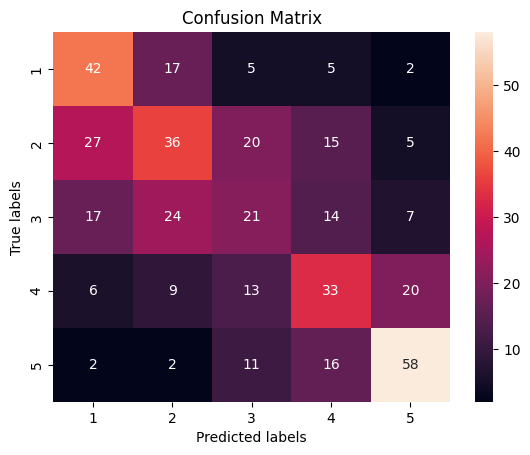

In [ ]:
cm = confusion_matrix(y_test, y_pred_lgb)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['1', '2', '3', '4', '5'])

plt.show()


In [60]:
#by Farruhbek Ergashov and Jamshid Axmadov
#data - https://www.kaggle.com/datasets/alxmamaev/market-comments-tonality-analys
